In [1]:
# Load libraries pandas & numpy

import numpy as np # linear algebra
import pandas as pd # data processing

# Data visualisation: Seaborn & Matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)


# Machine Learning
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
#Using pandas library and 'read_csv' function to read listings csv file 
nycab = pd.read_csv('listings.csv')
nycab

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50241,43366319,★☆Sunnyside☆★ Locals' favorite neighbor for li...,200239515,Shogo,Queens,Sunnyside,40.73816,-73.92574,Private room,29,28,0,NaN,NaN,35,54
50242,43366369,★☆Sunnyside☆★ Locals favorite neighbor for living,19303369,Hiroki,Queens,Sunnyside,40.73846,-73.92761,Private room,35,28,0,NaN,NaN,69,54
50243,43366411,★☆Sunnyside☆★ Locals' favorite neighbor for li...,19303369,Hiroki,Queens,Sunnyside,40.73936,-73.92748,Private room,29,28,0,NaN,NaN,69,54
50244,43366638,★☆Sunnyside☆★ Locals favorite neighbor for living,204704622,Momoyo,Queens,Sunnyside,40.73939,-73.92766,Private room,35,28,0,NaN,NaN,46,54


In [3]:
# checking basic info
nycab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50246 entries, 0 to 50245
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              50246 non-null  int64  
 1   name                            50228 non-null  object 
 2   host_id                         50246 non-null  int64  
 3   host_name                       50235 non-null  object 
 4   neighbourhood_group             50246 non-null  object 
 5   neighbourhood                   50246 non-null  object 
 6   latitude                        50246 non-null  float64
 7   longitude                       50246 non-null  float64
 8   room_type                       50246 non-null  object 
 9   price                           50246 non-null  int64  
 10  minimum_nights                  50246 non-null  int64  
 11  number_of_reviews               50246 non-null  int64  
 12  last_review                     

# Data Cleaning

In [4]:
# checking null values in every column
nycab.isnull().sum()

id                                    0
name                                 18
host_id                               0
host_name                            11
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11030
reviews_per_month                 11030
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# descriptive statistics for each variable

nycab.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.024600e+04,5.024600e+04,50246.000000,50246.000000,50246.000000,50246.000000,50246.000000,39216.000000,50246.000000,50246.000000
mean,2.283689e+07,8.553550e+07,40.729364,-73.951111,163.130777,7.912968,24.410978,1.091541,7.046292,121.786530
std,1.336840e+07,9.850817e+07,0.054592,0.047535,421.687803,21.472286,48.609159,1.425768,28.428846,140.634991
min,2.060000e+03,2.259000e+03,40.499790,-74.240840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.096980e+07,9.452198e+06,40.689940,-73.983490,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,2.229321e+07,3.861233e+07,40.723810,-73.955350,104.000000,3.000000,5.000000,0.510000,1.000000,65.000000
75%,3.526713e+07,1.389319e+08,40.762937,-73.934220,175.000000,5.000000,24.000000,1.570000,2.000000,249.000000
max,4.336667e+07,3.454685e+08,40.916990,-73.712990,10000.000000,1250.000000,746.000000,58.430000,294.000000,365.000000


In [6]:
# Descriptioon on non-numerical columns

nycab.describe(include=['O'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,50228,50235,50246,50246,50246,39216
unique,48945,11653,5,223,4,2038
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt,2020-01-01
freq,23,426,22382,3807,26073,992


In [7]:
# 检查不同features有哪些类型

print(nycab.room_type.unique())
print(nycab.neighbourhood_group.unique())
print(nycab.minimum_nights.unique())

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
[   1    3   29    2    4   30    7   14    5   12   28   31   33    6
   10   15   45   26   60  200    9   11   25   13   90   21    8   65
  365   20  120  180  123   85   27   18   22   88  150  370   32   19
  181   24   80  265  300   17  185  360  179   50 1000  250   38 1124
   62   70 1250  198  100  500   43  210  270   75   23   16  480   56
   99   55   40  186   35  366   68   93  140   47   91  299  400   52
  151   98   59  456  133  222  354   89  600  240  184  153  999   53
  275  160  182   44  114   36   76  304   63   46   95   72  238]


In [8]:
# Drop null values & useless columns

nycab = nycab.drop(['id','host_id'], axis=1)
nycab = nycab.dropna()
nycab.shape

(39199, 14)

In [9]:
nycab.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Modern NYC,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


In [10]:
# Remove outliners
Q1 = nycab.quantile(0.25)
Q3 = nycab.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

nycab2 = nycab[~((nycab < (Q1-1.5*IQR)) | (nycab > (Q3+1.5*IQR))).any(axis=1)]

# df without outliers
nycab2 

latitude                            0.07486
longitude                           0.04989
price                              98.00000
minimum_nights                      3.00000
number_of_reviews                  32.00000
reviews_per_month                   1.41000
calculated_host_listings_count      1.00000
availability_365                  249.00000
dtype: float64


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Modern NYC,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
3,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
9,Spacious river view in the West Village,Maria,Manhattan,West Village,40.73552,-74.01042,Entire home/apt,160,3,66,2019-08-10,0.50,1,116
17,Sweet and Spacious Brooklyn Loft,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49887,Private | Washer/Dryer | 3BD | 2BA | Furnished,Anne,Brooklyn,East New York,40.66418,-73.88172,Entire home/apt,200,5,1,2020-04-28,1.00,1,137
50014,Newly Renovated | Free Parking | Lux 3BD/1BA,Amy,Brooklyn,East New York,40.66575,-73.87974,Entire home/apt,100,5,3,2020-04-30,3.00,1,0
50022,Cozy and private bedroom in Manhattan.,Inacio,Manhattan,Harlem,40.82124,-73.95479,Private room,49,1,1,2020-04-29,1.00,2,180
50114,"Amazing, light-filled, 2-Bedroom Apartment",Matthew,Manhattan,Chinatown,40.71819,-73.99523,Entire home/apt,160,2,1,2020-05-04,1.00,1,16


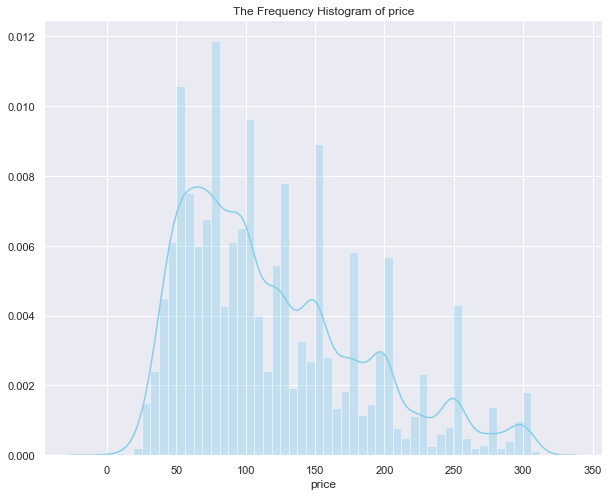

In [11]:
fig, axes = plt.subplots(figsize=(10, 8), sharex=True)
sns.distplot( nycab2["price"] , color="skyblue")
plt.title("The Frequency Histogram of price")
plt.show()

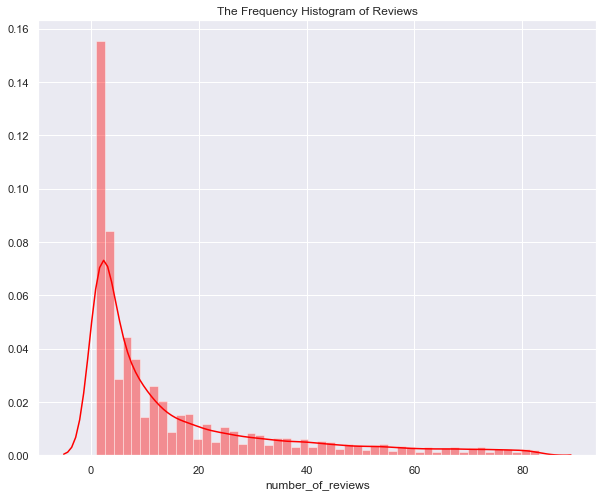

In [12]:
fig, axes = plt.subplots(figsize=(10, 8), sharex=True)
sns.distplot( nycab2["number_of_reviews"] , color="red")
plt.title("The Frequency Histogram of Reviews")
plt.show()

In [13]:
# Description on numerical columns

nycab2.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23122.000000,23122.000000,23122.000000,23122.000000,23122.000000,23122.000000,23122.000000,23122.000000
mean,40.728127,-73.955327,119.578410,2.806245,15.461811,0.695637,1.277225,80.487415
std,0.054134,0.030568,64.564634,1.701936,18.893333,0.803950,0.570037,120.852839
min,40.576440,-74.039420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.688550,-73.980940,70.000000,2.000000,2.000000,0.120000,1.000000,0.000000
50%,40.719820,-73.954375,100.000000,2.000000,7.000000,0.370000,1.000000,0.000000
75%,40.763690,-73.937722,155.000000,4.000000,21.000000,0.990000,1.000000,127.000000
max,40.875400,-73.857660,312.000000,9.000000,83.000000,3.680000,3.000000,365.000000


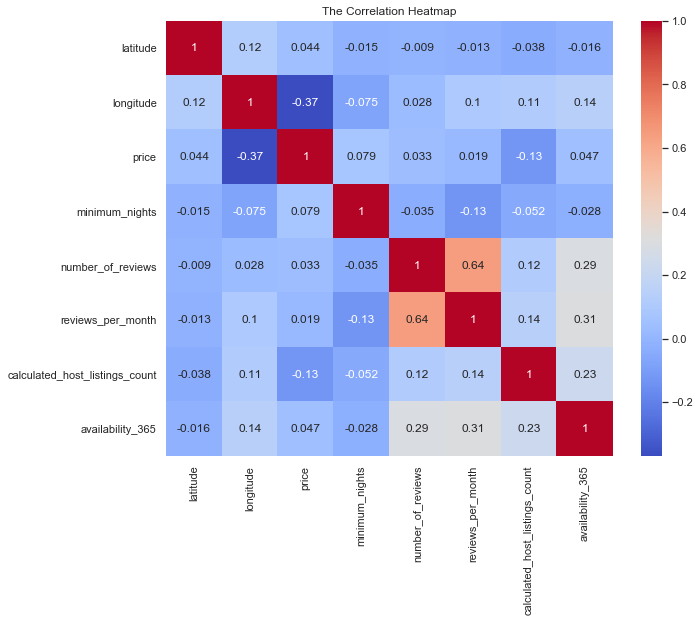

In [14]:
plt.figure(figsize = (10,8))
hm = nycab2.corr()

sns.heatmap(hm, cmap = 'coolwarm', annot=True)
plt.title('The Correlation Heatmap')
plt.show()

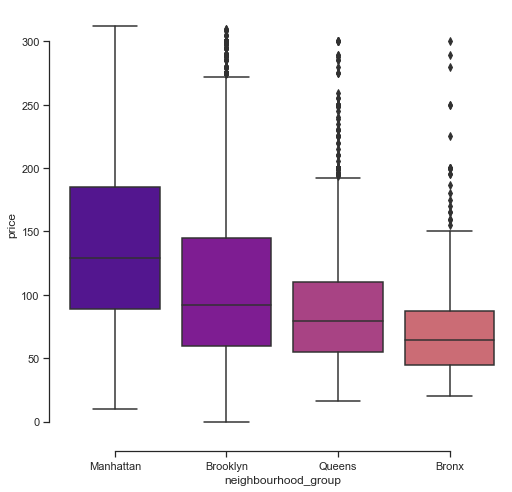

In [15]:
import seaborn as sns
sns.set(style="ticks", palette="plasma")
# Draw a nested boxplot to show bills by day and time
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x="neighbourhood_group", y="price",
            data=nycab2)
sns.despine(offset=10, trim=True)

Text(0.5, 1.0, 'Neighbourhood Group')

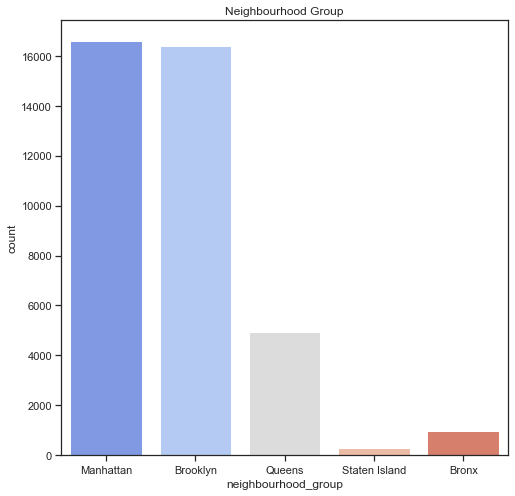

In [16]:
sns.countplot(nycab['neighbourhood_group'], palette="coolwarm")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Neighbourhood Group')

In [17]:
nycab2.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx'], dtype=object)

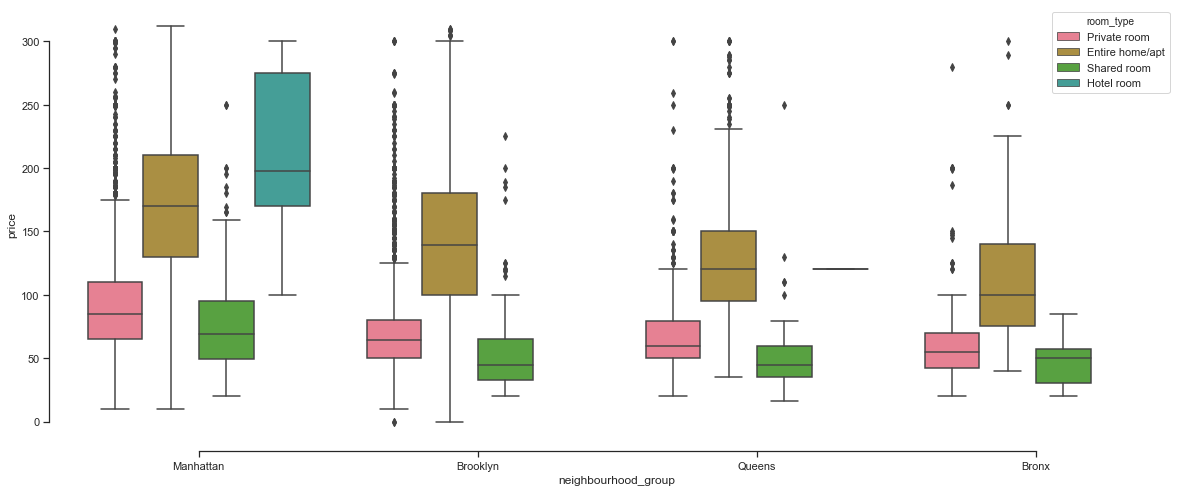

In [18]:
import seaborn as sns
sns.set(style="ticks", palette="husl")


# Draw a nested boxplot to show bills by day and time
f, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="neighbourhood_group", y="price",
            hue="room_type",
            data=nycab2)
sns.despine(offset=10, trim=True)

# One-hot Encoder: Converting Categorical data

Each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. 


In [19]:
# one-hot encoder (Categorical variables to numerical data)
# generate binary values using get_dummies

'''neighbourhood_group''' 

nycab_dum = pd.get_dummies(nycab2, columns=["neighbourhood_group"], prefix=["loc"] )
# merge with main df bridge_df on key values
nycab_dum = nycab2.merge(nycab_dum, how='outer')


nycab_dum

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,loc_Bronx,loc_Brooklyn,loc_Manhattan,loc_Queens
0,Modern NYC,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1,0,0,1,0
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365,0,0,1,0
2,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0,0,0,1,0
3,Spacious river view in the West Village,Maria,Manhattan,West Village,40.73552,-74.01042,Entire home/apt,160,3,66,2019-08-10,0.50,1,116,0,0,1,0
4,Sweet and Spacious Brooklyn Loft,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23117,Private | Washer/Dryer | 3BD | 2BA | Furnished,Anne,Brooklyn,East New York,40.66418,-73.88172,Entire home/apt,200,5,1,2020-04-28,1.00,1,137,0,1,0,0
23118,Newly Renovated | Free Parking | Lux 3BD/1BA,Amy,Brooklyn,East New York,40.66575,-73.87974,Entire home/apt,100,5,3,2020-04-30,3.00,1,0,0,1,0,0
23119,Cozy and private bedroom in Manhattan.,Inacio,Manhattan,Harlem,40.82124,-73.95479,Private room,49,1,1,2020-04-29,1.00,2,180,0,0,1,0
23120,"Amazing, light-filled, 2-Bedroom Apartment",Matthew,Manhattan,Chinatown,40.71819,-73.99523,Entire home/apt,160,2,1,2020-05-04,1.00,1,16,0,0,1,0


In [23]:
'''room_type'''

nycab_dum2 = pd.get_dummies(nycab_dum, columns=["room_type"], prefix=["Type"] )
# merge with main df bridge_df on key values
nycab_dum2 = nycab_dum.merge(nycab_dum2, how='outer')


nycab_dum2

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,loc_Bronx,loc_Brooklyn,loc_Manhattan,loc_Queens,Type_Entire home/apt,Type_Hotel room,Type_Private room,Type_Shared room
0,Modern NYC,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,...,1,1,0,0,1,0,0,0,1,0
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,...,2,365,0,0,1,0,1,0,0,0
2,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,...,1,0,0,0,1,0,1,0,0,0
3,Spacious river view in the West Village,Maria,Manhattan,West Village,40.73552,-74.01042,Entire home/apt,160,3,66,...,1,116,0,0,1,0,1,0,0,0
4,Sweet and Spacious Brooklyn Loft,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23117,Private | Washer/Dryer | 3BD | 2BA | Furnished,Anne,Brooklyn,East New York,40.66418,-73.88172,Entire home/apt,200,5,1,...,1,137,0,1,0,0,1,0,0,0
23118,Newly Renovated | Free Parking | Lux 3BD/1BA,Amy,Brooklyn,East New York,40.66575,-73.87974,Entire home/apt,100,5,3,...,1,0,0,1,0,0,1,0,0,0
23119,Cozy and private bedroom in Manhattan.,Inacio,Manhattan,Harlem,40.82124,-73.95479,Private room,49,1,1,...,2,180,0,0,1,0,0,0,1,0
23120,"Amazing, light-filled, 2-Bedroom Apartment",Matthew,Manhattan,Chinatown,40.71819,-73.99523,Entire home/apt,160,2,1,...,1,16,0,0,1,0,1,0,0,0


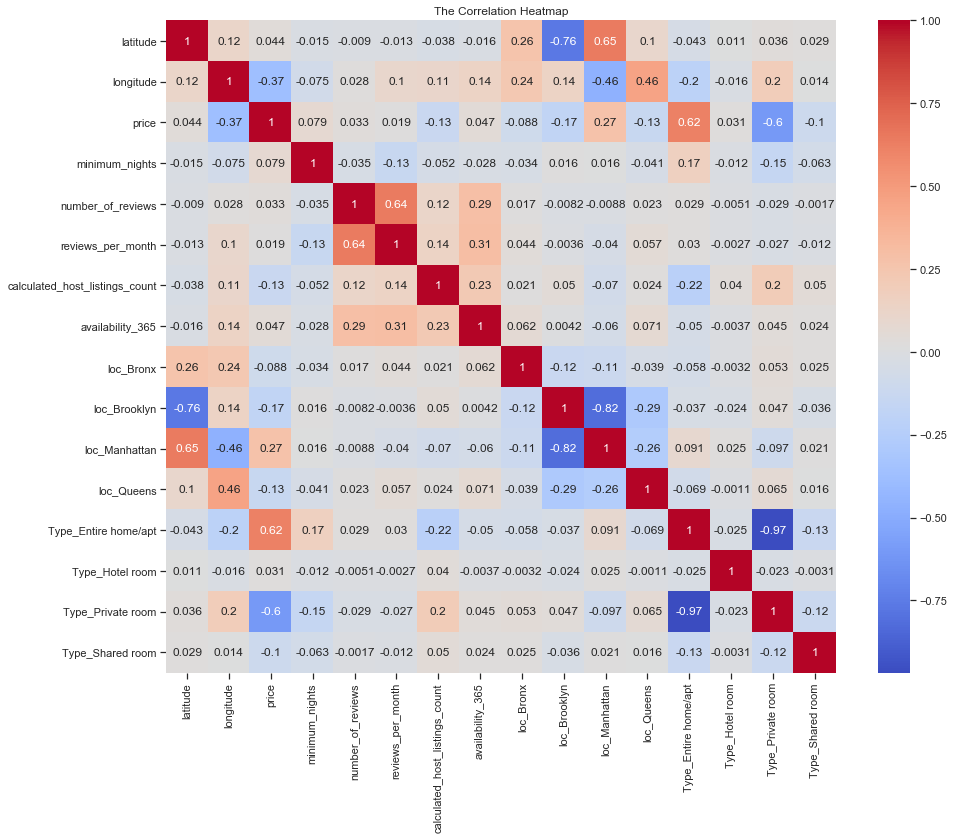

In [24]:
# Correlation between different variables (after one-hot encoding)
plt.figure(figsize = (15,12))
hm = nycab_dum2.corr()

sns.heatmap(hm, cmap = 'coolwarm', annot=True)
plt.title('The Correlation Heatmap')
plt.show()

In [25]:
'''neighbourhood''' 

nycab_dum3 = pd.get_dummies(nycab_dum2, columns=["neighbourhood"], prefix=["area"] )
# merge with main df bridge_df on key values
nycab_dum3 = nycab_dum3.merge(nycab_dum3, how='outer')


nycab_dum3

,name,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,...,area_Van Nest,area_Vinegar Hill,area_Washington Heights,area_West Farms,area_West Village,area_Williamsbridge,area_Williamsburg,area_Windsor Terrace,area_Woodhaven,area_Woodside
0,Modern NYC,Jenny,Manhattan,40.85722,-73.93790,Private room,100,1,1,2008-09-22,...,0,0,1,0,0,0,0,0,0,0
1,Skylit Midtown Castle,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,...,0,0,0,0,0,0,0,0,0,0
2,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,...,0,0,0,0,0,0,0,0,0,0
3,Spacious river view in the West Village,Maria,Manhattan,40.73552,-74.01042,Entire home/apt,160,3,66,2019-08-10,...,0,0,0,0,1,0,0,0,0,0
4,Sweet and Spacious Brooklyn Loft,Chaya,Brooklyn,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23117,Private | Washer/Dryer | 3BD | 2BA | Furnished,Anne,Brooklyn,40.66418,-73.88172,Entire home/apt,200,5,1,2020-04-28,...,0,0,0,0,0,0,0,0,0,0
23118,Newly Renovated | Free Parking | Lux 3BD/1BA,Amy,Brooklyn,40.66575,-73.87974,Entire home/apt,100,5,3,2020-04-30,...,0,0,0,0,0,0,0,0,0,0
23119,Cozy and private bedroom in Manhattan.,Inacio,Manhattan,40.82124,-73.95479,Private room,49,1,1,2020-04-29,...,0,0,0,0,0,0,0,0,0,0
23120,"Amazing, light-filled, 2-Bedroom Apartment",Matthew,Manhattan,40.71819,-73.99523,Entire home/apt,160,2,1,2020-05-04,...,0,0,0,0,0,0,0,0,0,0


# Wordcloud

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [27]:
from wordcloud import WordCloud

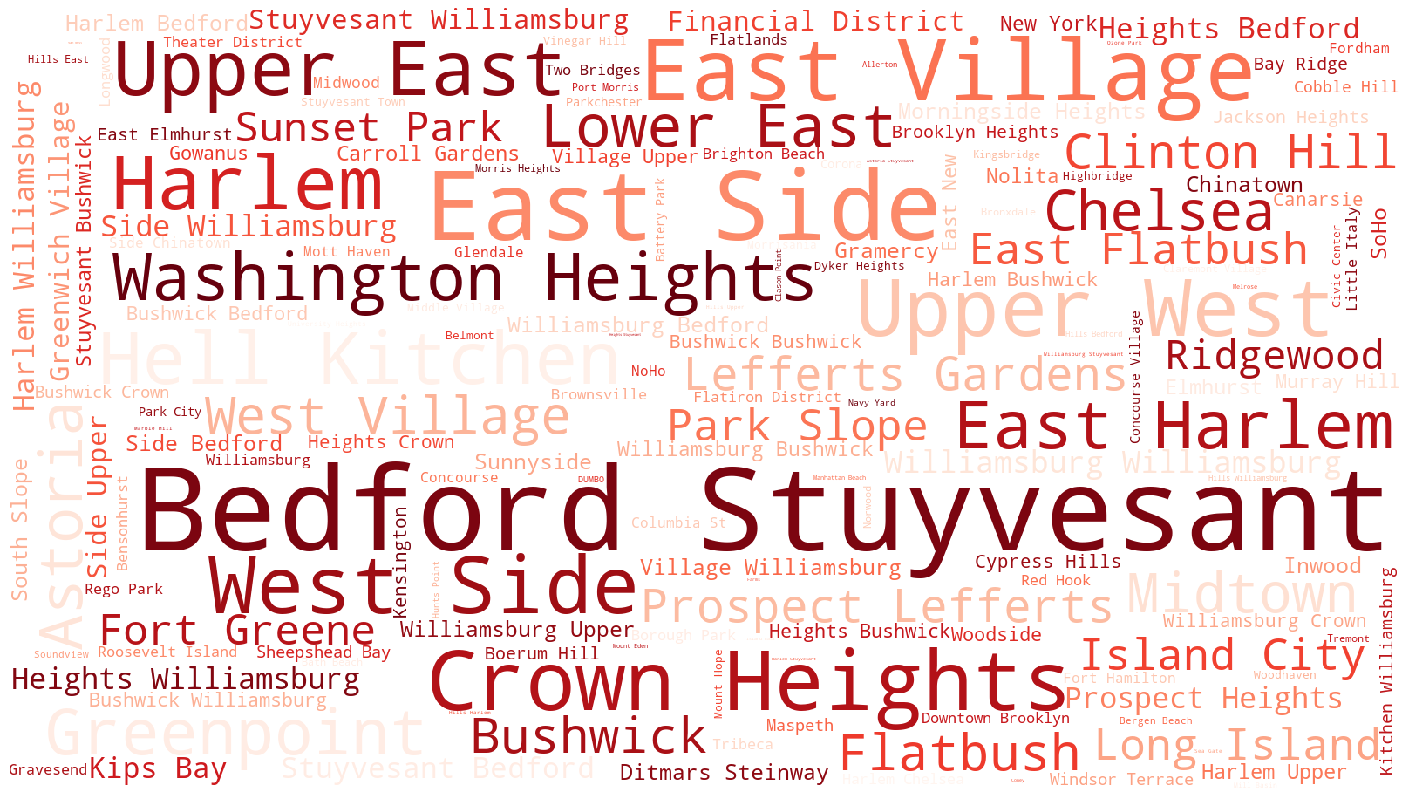

In [29]:
# Word cloud plot
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1600, height=900,colormap="Reds"
                         ).generate(" ".join(nycab2.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Linear Regression

In [30]:
lm = LinearRegression()
#Defining the independent variables and dependent variables

# nycab_dum2: 22 colums ('room types' + 'neighbourhood_group')

x = nycab_dum2[['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
          'calculated_host_listings_count','availability_365','loc_Bronx','loc_Brooklyn',
               'loc_Manhattan','loc_Queens','Type_Entire home/apt','Type_Hotel room','Type_Private room','Type_Shared room']]
y = nycab_dum2['price']

#Getting Test and Training Set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 46.476830459535904
        R2 Score: 47.30339788431377
        Mean Absolute Error: 34.54919147497246
     


In [33]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(10)

,Actual Values,Predicted Values
0,43,79.912975
1,55,62.372451
2,75,66.681216
3,75,91.083239
4,120,75.035852
5,78,98.911246
6,120,163.421798
7,65,87.645536
8,160,177.104285
9,155,159.473921


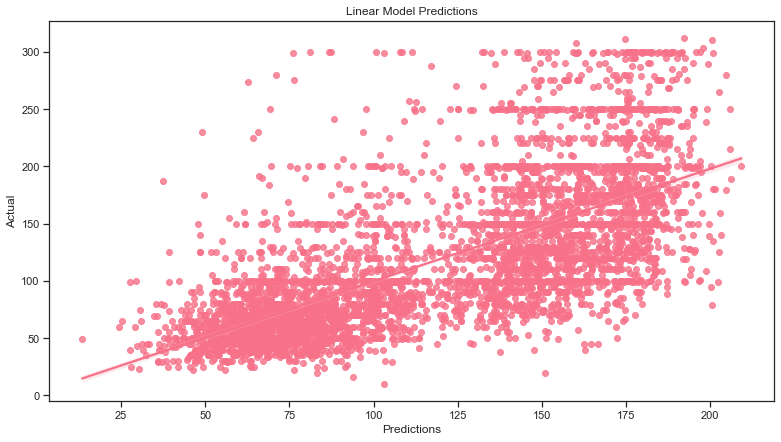

In [34]:
plt.figure(figsize=(13,7))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

In [35]:
## df: nycab_dum3

df = nycab_dum3.iloc[:, np.r_[3,4,7,8,10:145]]

df.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,loc_Bronx,loc_Brooklyn,loc_Manhattan,...,area_Van Nest,area_Vinegar Hill,area_Washington Heights,area_West Farms,area_West Village,area_Williamsbridge,area_Williamsburg,area_Windsor Terrace,area_Woodhaven,area_Woodside
0,40.85722,-73.93790,1,1,0.01,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,40.75362,-73.98377,3,48,0.38,2,365,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,40.74767,-73.97500,3,78,0.58,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,40.73552,-74.01042,3,66,0.50,1,116,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,40.71842,-73.95718,3,9,0.07,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
lm = LinearRegression()
#Defining the independent variables and dependent variables

# nycab_dum2: 22 colums ('room types' + 'neighbourhood_group')

x = df
y = nycab_dum3['price']

#Getting Test and Training Set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 45.06181507246478
        R2 Score: 50.46331179563703
        Mean Absolute Error: 33.195112851679326
     


In [41]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(10)

,Actual Values,Predicted Values
0,43,55.182753
1,55,62.139604
2,75,66.889331
3,75,92.852039
4,120,60.156590
5,78,95.950899
6,120,136.618667
7,65,74.843154
8,160,176.069889
9,155,137.398703


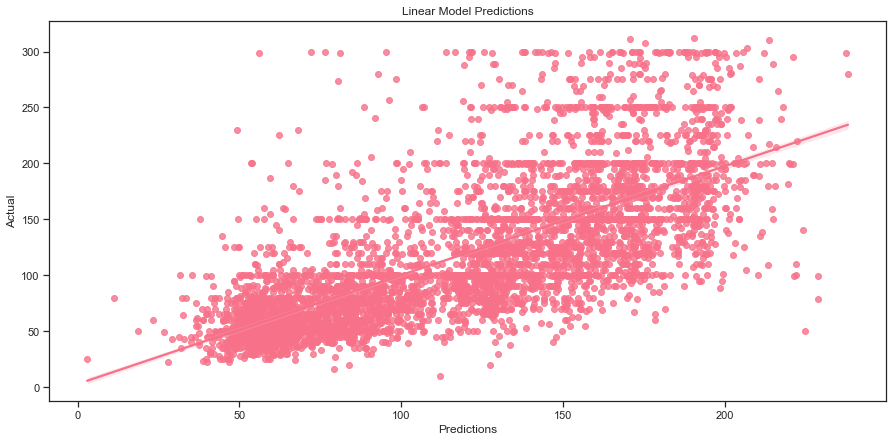

In [38]:
plt.figure(figsize=(15,7))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

## Coefficients as Feature Importance
Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

# Gradient Boosted Regressor

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

In [ ]:
#Get Predictions & Metrics
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))

In [ ]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

error_airbnb.head(5)

In [ ]:
plt.figure(figsize=(13,8))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()

# Decision Tree